# Employee Feedback Sentiment Analysis: Understanding Employee Sentiment from Surveys and Review to Improve Employee Engagement and Productivitity

## 1. Import packages 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install wordcloud
from wordcloud import WordCloud

## 2. Understanding the data 

In [5]:
df = pd.read_csv('DatasetEMplSentiment.csv')

In [6]:
df.head()

,ID,Comment_Positives,Comment_Negatives,Advice_To_Mgmt,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Employee_Engagement_Activities,Employee_Tenure,Location,Feedback_Date,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
0,1,People are smart and friendly,Bureaucracy is slowing things down,NaN,5,5,5,5,3,5,No,7,CityA,2023-01-16 23:32:22.717722,5,1,4
1,2,"1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,5,5,5,5,3,5,No,2,CityA,2023-04-03 23:32:22.717722,1,2,4
2,3,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5,5,5,5,3,5,Yes,5,CityC,2023-06-25 23:32:22.717722,3,5,4
3,4,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,4,4,5,5,2,4,Yes,5,CityB,2023-08-04 23:32:22.717722,3,4,3
4,10,Impact driven. Best tech in the world.,Size matters. Engineers are a bit disconnected...,NaN,4,4,5,5,2,4,No,8,CityB,2023-03-31 23:32:22.717722,5,2,3


### Understanding  statistical overview of the numerical values

In [8]:
df.columns

Index(['ID', 'Comment_Positives', 'Comment_Negatives', 'Advice_To_Mgmt',
       'Overall_Ratings', 'Work_Balance_Stars', 'Culture_Values_Stars',
       'Career_Opportunities_Stars', 'Comp_Benefit_Stars',
       'Senior_Management_Stars', 'Employee_Engagement_Activities',
       'Employee_Tenure', 'Location', 'Feedback_Date',
       'Career_Growth_Opportunities_Stars', 'Wellness_Programs_Satisfaction',
       'Remote_Work_Satisfaction'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30336.0,33998.602716,19506.284643,1.0,17198.75,34121.5,50907.5,67528.0
Overall_Ratings,30336.0,3.588179,0.996981,1.0,3.00,4.0,4.0,5.0
Work_Balance_Stars,30336.0,3.588179,0.996981,1.0,3.00,4.0,4.0,5.0
Culture_Values_Stars,30336.0,4.391218,0.771997,2.0,4.00,5.0,5.0,5.0
Career_Opportunities_Stars,30336.0,4.391218,0.771997,2.0,4.00,5.0,5.0,5.0
Comp_Benefit_Stars,30336.0,1.746242,0.763744,1.0,1.00,2.0,2.0,3.0
Senior_Management_Stars,30336.0,3.588179,0.996981,1.0,3.00,4.0,4.0,5.0
Employee_Tenure,30336.0,5.493671,2.885124,1.0,3.00,5.0,8.0,10.0
Career_Growth_Opportunities_Stars,30336.0,3.192181,1.722801,1.0,1.00,3.0,5.0,5.0
Wellness_Programs_Satisfaction,30336.0,3.251187,1.423715,1.0,2.00,4.0,5.0,5.0


## 3. Data preprocessing 
- Identify and fix missing values,
- Checking for duplicate rows

In [11]:
df.isnull().any()

ID                                   False
Comment_Positives                    False
Comment_Negatives                    False
Advice_To_Mgmt                        True
Overall_Ratings                      False
Work_Balance_Stars                   False
Culture_Values_Stars                 False
Career_Opportunities_Stars           False
Comp_Benefit_Stars                   False
Senior_Management_Stars              False
Employee_Engagement_Activities       False
Employee_Tenure                      False
Location                             False
Feedback_Date                        False
Career_Growth_Opportunities_Stars    False
Wellness_Programs_Satisfaction       False
Remote_Work_Satisfaction             False
dtype: bool

In [12]:
df.isnull().sum()

ID                                       0
Comment_Positives                        0
Comment_Negatives                        0
Advice_To_Mgmt                       13443
Overall_Ratings                          0
Work_Balance_Stars                       0
Culture_Values_Stars                     0
Career_Opportunities_Stars               0
Comp_Benefit_Stars                       0
Senior_Management_Stars                  0
Employee_Engagement_Activities           0
Employee_Tenure                          0
Location                                 0
Feedback_Date                            0
Career_Growth_Opportunities_Stars        0
Wellness_Programs_Satisfaction           0
Remote_Work_Satisfaction                 0
dtype: int64

In [13]:
df['Advice_To_Mgmt'].isnull().value_counts()

Advice_To_Mgmt
False    16893
True     13443
Name: count, dtype: int64

In [14]:
# df['Advice_To_Mgmt'].fillna('No comment', inplace = True) # or 

df['Advice_To_Mgmt'] = df['Advice_To_Mgmt'].fillna('No comment')


In [15]:
df.isnull().any()

ID                                   False
Comment_Positives                    False
Comment_Negatives                    False
Advice_To_Mgmt                       False
Overall_Ratings                      False
Work_Balance_Stars                   False
Culture_Values_Stars                 False
Career_Opportunities_Stars           False
Comp_Benefit_Stars                   False
Senior_Management_Stars              False
Employee_Engagement_Activities       False
Employee_Tenure                      False
Location                             False
Feedback_Date                        False
Career_Growth_Opportunities_Stars    False
Wellness_Programs_Satisfaction       False
Remote_Work_Satisfaction             False
dtype: bool

In [16]:
df.duplicated().any()

False

## 4. Data Analysis and Visualization 
- Univariate Analysis,
- Bivariate Analyis, 
- Word Frequency Analysis, 
- Temporal Analysis.

### 4.1. Univariate Analysis
- Numerical Variables,
- Categorical Variables 

### 4.1.1 Univariate Analysis: Numerical Variables

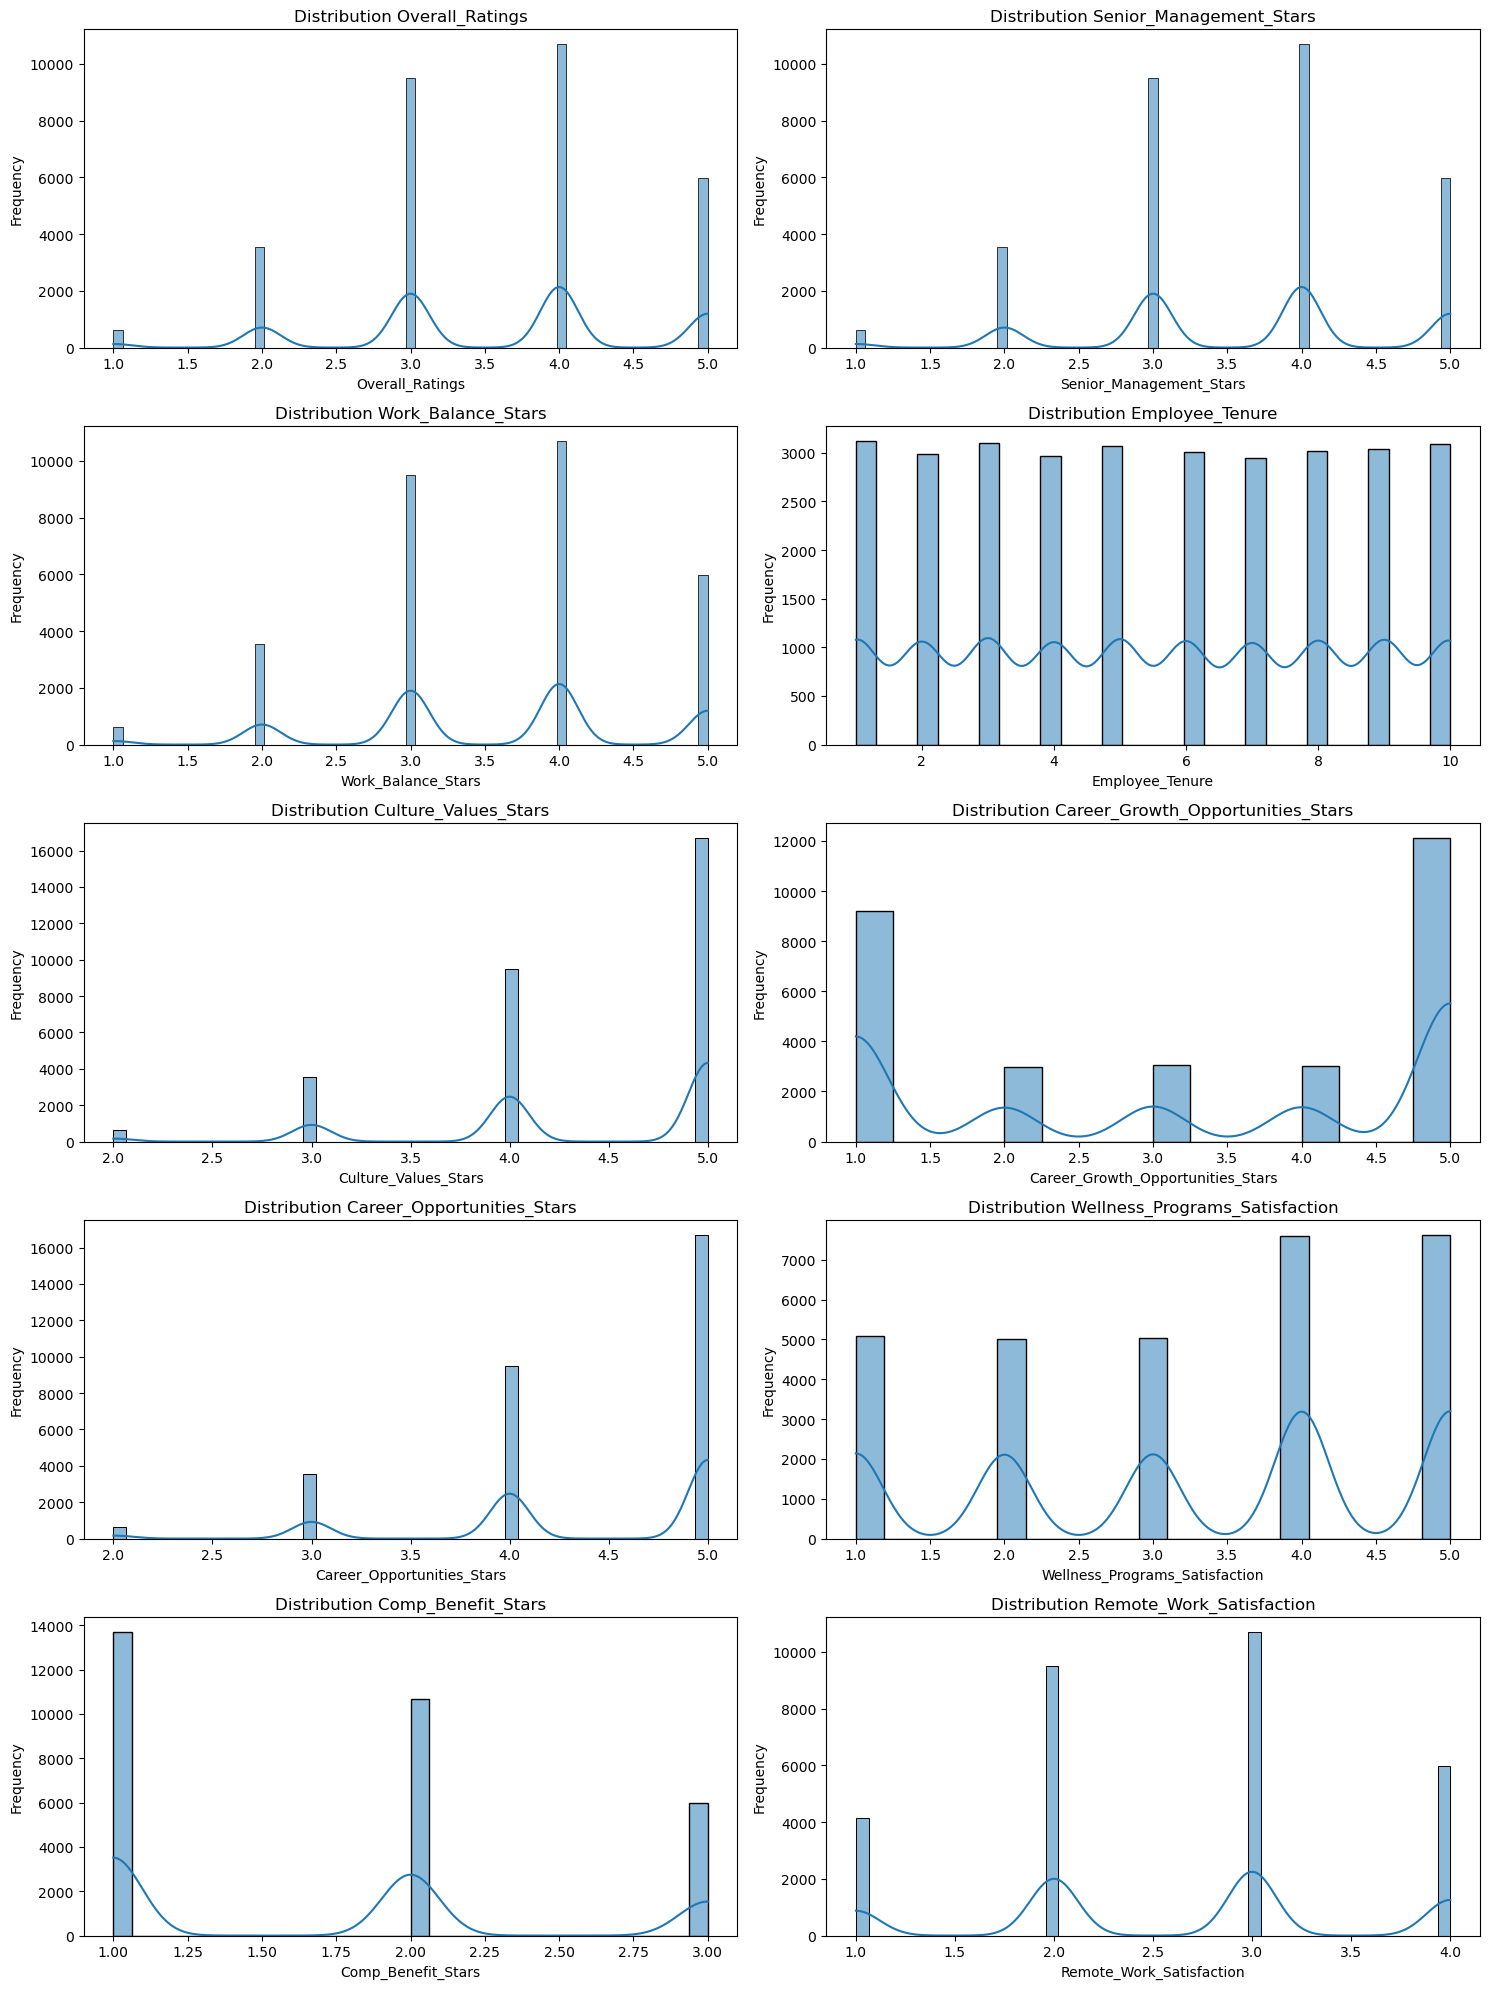

In [20]:
nuerical_columns = [
    'Overall_Ratings', 'Work_Balance_Stars', 'Culture_Values_Stars', 'Career_Opportunities_Stars', 'Comp_Benefit_Stars',
    'Senior_Management_Stars', 'Employee_Tenure', 'Career_Growth_Opportunities_Stars', 'Wellness_Programs_Satisfaction',
    'Remote_Work_Satisfaction'
]

fig, axes = plt.subplots(5, 2, figsize = (15, 20))
for i, col in enumerate(nuerical_columns[:5]):
    sns.histplot(df[col], kde = True, ax = axes[i, 0])
    axes[i, 0].set_title(f'Distribution {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')


for i, col in enumerate(nuerical_columns[5:]):
    sns.histplot(df[col], kde = True, ax = axes[i, 1])
    axes[i, 1].set_title(f'Distribution {col}')
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
df['Overall_Ratings'].value_counts()

Overall_Ratings
4    10688
3     9510
5     5975
2     3531
1      632
Name: count, dtype: int64

In [22]:
df['Work_Balance_Stars'].value_counts()

Work_Balance_Stars
4    10688
3     9510
5     5975
2     3531
1      632
Name: count, dtype: int64

In [23]:
df['Culture_Values_Stars'].value_counts()

Culture_Values_Stars
5    16663
4     9510
3     3531
2      632
Name: count, dtype: int64

In [24]:
df['Career_Opportunities_Stars'].value_counts()

Career_Opportunities_Stars
5    16663
4     9510
3     3531
2      632
Name: count, dtype: int64

In [25]:
df['Comp_Benefit_Stars'].value_counts()

Comp_Benefit_Stars
1    13673
2    10688
3     5975
Name: count, dtype: int64

In [26]:
df['Senior_Management_Stars'].value_counts()

Senior_Management_Stars
4    10688
3     9510
5     5975
2     3531
1      632
Name: count, dtype: int64

In [27]:
df['Employee_Tenure'].value_counts()

Employee_Tenure
1     3116
3     3097
10    3086
5     3065
9     3043
8     3020
6     3006
2     2986
4     2970
7     2947
Name: count, dtype: int64

In [28]:
df['Career_Growth_Opportunities_Stars'].value_counts()

Career_Growth_Opportunities_Stars
5    12096
1     9199
3     3065
4     3006
2     2970
Name: count, dtype: int64

In [29]:
df['Wellness_Programs_Satisfaction'].value_counts()

Wellness_Programs_Satisfaction
5    7612
4    7587
1    5088
3    5034
2    5015
Name: count, dtype: int64

In [30]:
df['Remote_Work_Satisfaction'].value_counts()

Remote_Work_Satisfaction
3    10688
2     9510
4     5975
1     4163
Name: count, dtype: int64

## Key Insights
### Here's what we discovered:

- Overall Ratings: Most employees rate their experience as average to good, but a notable portion is dissatisfied. Addressing their concerns could significantly boost morale.

- Work-Life Balance: The majority find the work-life balance satisfactory, yet there's a significant group feeling otherwise. Improving this aspect could enhance overall satisfaction.

- Company Culture: A strong positive sentiment towards the company’s culture is evident, with high ratings. This is a key strength we can continue to build on.

- Career Opportunities: While many employees see good growth opportunities, there's a divide. Ensuring consistent career advancement across all levels could reduce dissatisfaction.

- Compensation & Benefits: A major area of concern. Most employees are unhappy with their compensation, indicating an urgent need to review and possibly revamp our compensation packages.

- Senior Management: Perceptions are mixed but generally positive. There’s room for improvement in how leadership is perceived across the board.

- Employee Tenure: A balanced mix of new and long-term employees suggests stability, but there might be challenges in retaining staff beyond the 1-3 year mark.

- Career Growth Opportunities: A significant portion of employees see strong career growth, but there’s a notable group with concerns. Addressing these can help retain top talent.

- Wellness Programs: High satisfaction with wellness initiatives indicates these are well-received, though there’s always room to fine-tune and meet diverse needs.

- Remote Work Satisfaction: Remote work satisfaction is average, highlighting an opportunity to enhance our remote work policies and practices.



#### 4.1.2 Univariate Analysis: Categorical Variables

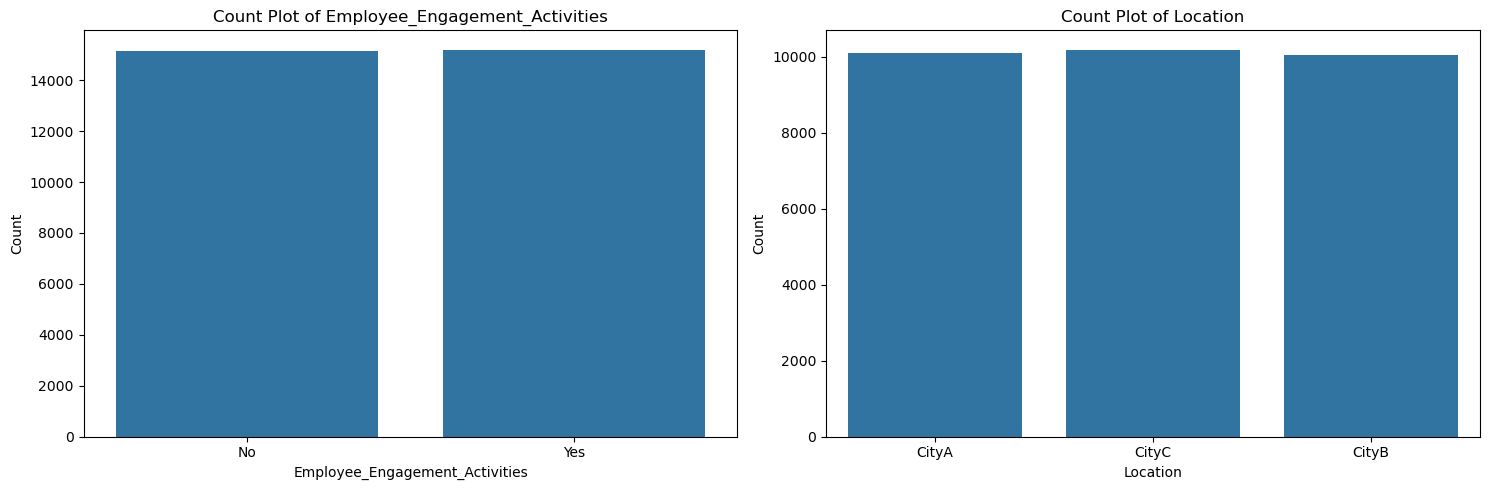

In [33]:
categorical_columns = ['Employee_Engagement_Activities', 'Location']

fig, axes = plt.subplots(1, 2, figsize = (15 , 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x = col, data = df, ax = axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [34]:
df['Employee_Engagement_Activities'].value_counts()

Employee_Engagement_Activities
Yes    15199
No     15137
Name: count, dtype: int64

In [35]:
df['Location'].value_counts()

Location
CityC    10189
CityA    10090
CityB    10057
Name: count, dtype: int64

### 4.2 Bivariate Analysis 
- Pairs of Numerical Variables,
- Pairs of Categorical Variables,
- Pair of numerical and Categorical Variables. 

### 4.2.1 Bivariate Analysis: Pairs of Numerical Variables

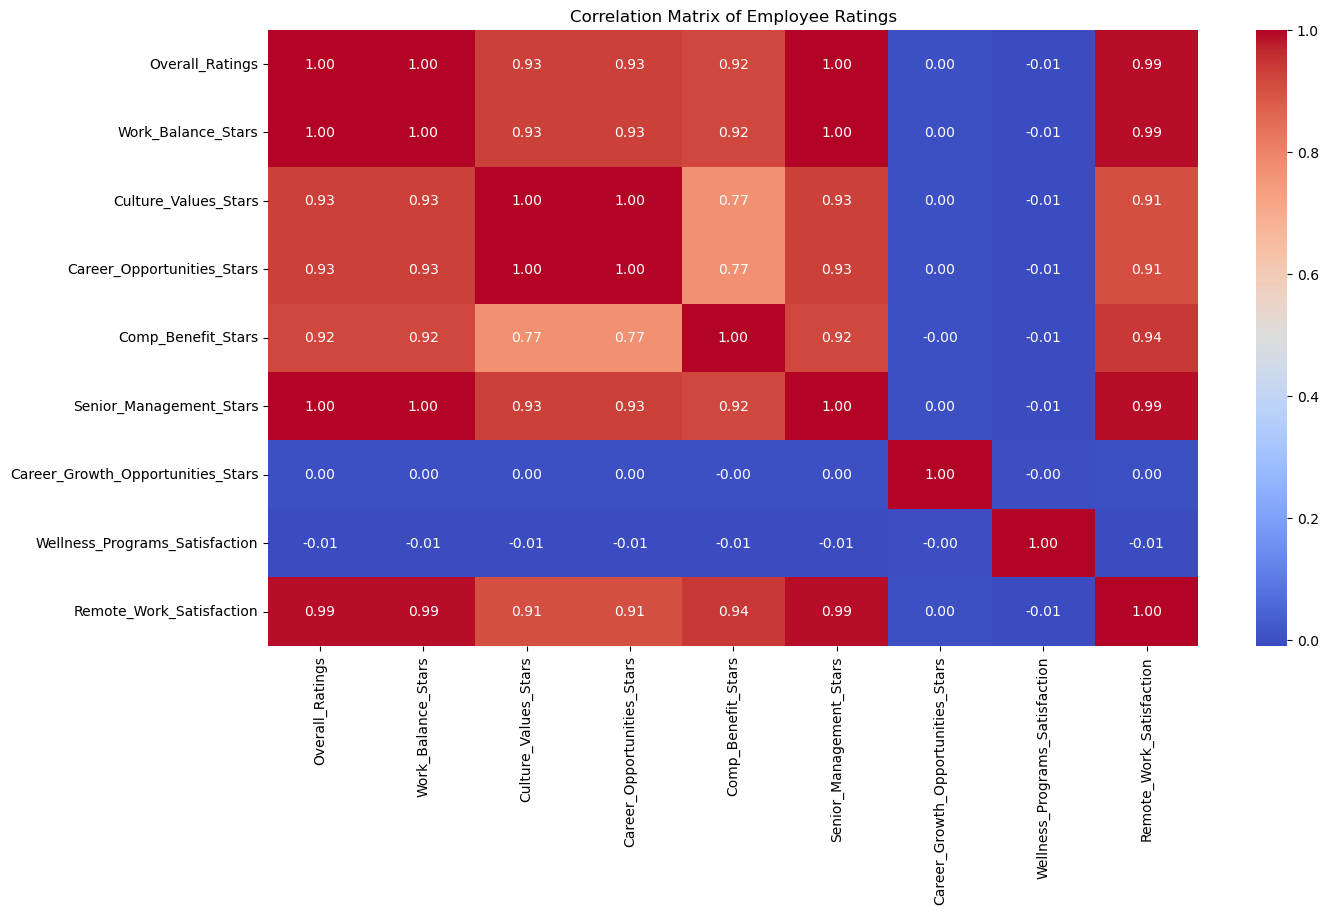

In [38]:
rating_columns = [
    'Overall_Ratings', 'Work_Balance_Stars', 'Culture_Values_Stars', 'Career_Opportunities_Stars', 'Comp_Benefit_Stars', 
    'Senior_Management_Stars', 'Career_Growth_Opportunities_Stars', 'Wellness_Programs_Satisfaction', 'Remote_Work_Satisfaction'
]

rating_correlation = df[rating_columns].corr()

plt.figure(figsize = (15, 8))
sns.heatmap(rating_correlation, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix of Employee Ratings')
plt.show()

In [39]:
rating_correlation

,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
Overall_Ratings,1.000000,1.000000,0.930129,0.930129,0.920971,1.000000,0.000248,-0.006199,0.990315
Work_Balance_Stars,1.000000,1.000000,0.930129,0.930129,0.920971,1.000000,0.000248,-0.006199,0.990315
Culture_Values_Stars,0.930129,0.930129,1.000000,1.000000,0.770535,0.930129,0.000823,-0.006271,0.906179
Career_Opportunities_Stars,0.930129,0.930129,1.000000,1.000000,0.770535,0.930129,0.000823,-0.006271,0.906179
Comp_Benefit_Stars,0.920971,0.920971,0.770535,0.770535,1.000000,0.920971,-0.000015,-0.009440,0.942987
Senior_Management_Stars,1.000000,1.000000,0.930129,0.930129,0.920971,1.000000,0.000248,-0.006199,0.990315
Career_Growth_Opportunities_Stars,0.000248,0.000248,0.000823,0.000823,-0.000015,0.000248,1.000000,-0.004535,0.000331
Wellness_Programs_Satisfaction,-0.006199,-0.006199,-0.006271,-0.006271,-0.009440,-0.006199,-0.004535,1.000000,-0.006582
Remote_Work_Satisfaction,0.990315,0.990315,0.906179,0.906179,0.942987,0.990315,0.000331,-0.006582,1.000000


## Project Spotlight: Interpretation of Correlation Analysis

Some fascinating insights through a detailed correlation analysis of nine key variables. Here’s what we discovered:

- Work-Life Balance is Everything!
There’s a perfect positive correlation between overall satisfaction and work-life balance. Employees who feel balanced in their work and personal lives are far more likely to rate their overall experience highly. This underscores the critical importance of promoting a healthy work-life balance.

- Culture and Career Opportunities Matter
A strong positive correlation exists between overall ratings and both company culture and career opportunities. This tells us that fostering a positive culture and providing clear career growth paths are essential for keeping employees happy and engaged.

- Compensation & Leadership: A Winning Combo
Competitive compensation and strong leadership are also key drivers of satisfaction. Employees who feel valued and supported by senior management give top ratings to their overall experience.

- The Remote Work Revelation
Remote work satisfaction has a very strong positive correlation with overall ratings. As remote work becomes more prevalent, maintaining high standards in this area is crucial for keeping employees satisfied and motivated.

- Opportunities for Growth
Interestingly, wellness programs and career growth opportunities show limited impact on overall satisfaction. This might suggest areas where companies can enhance their offerings or better communicate their value to employees.

- Key Takeaway: To boost employee satisfaction, focus on work-life balance, culture, career opportunities, compensation, and leadership. These are the areas that truly make a difference.



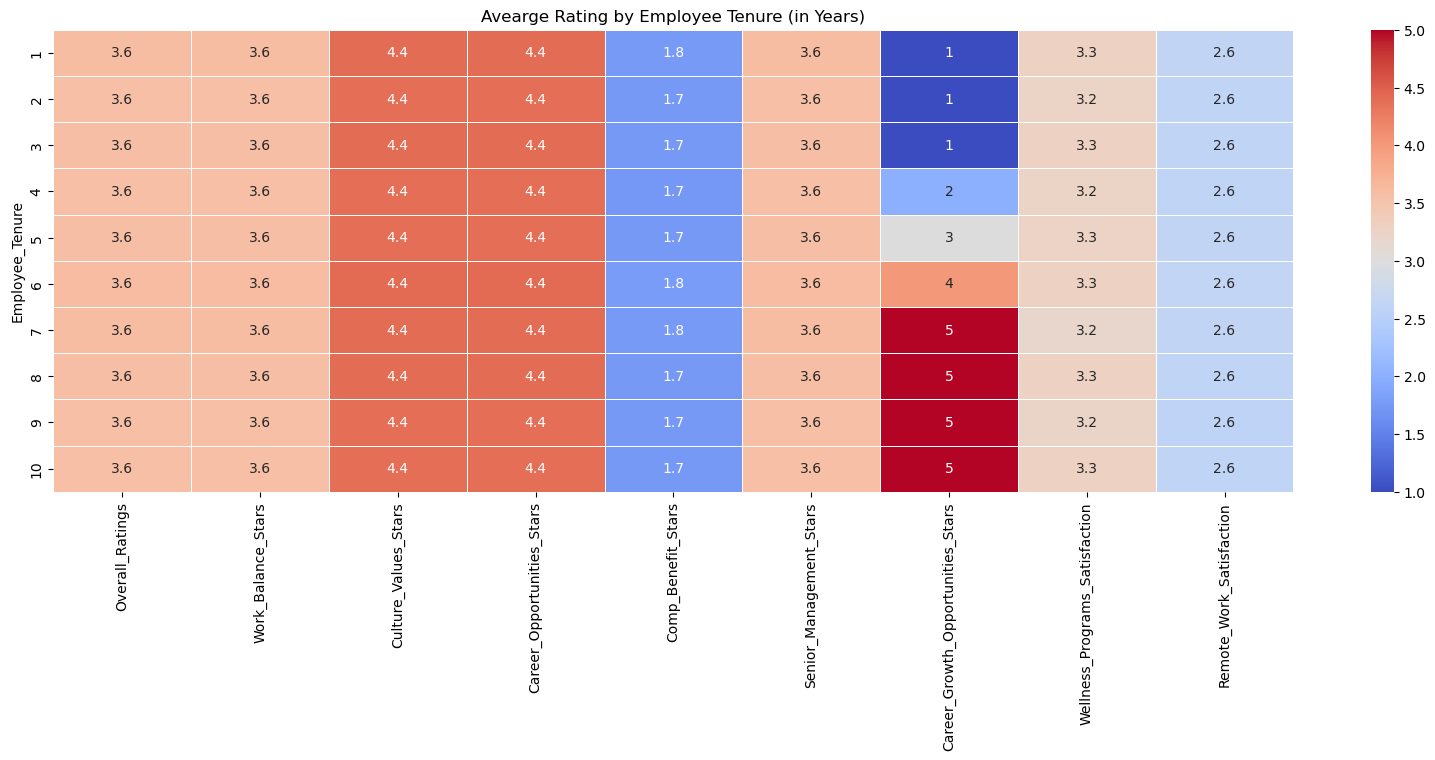

In [41]:
rating_grouped = df.groupby('Employee_Tenure')[rating_columns].mean()

plt.figure(figsize = (20, 6))

ax = sns.heatmap(rating_grouped, cmap = 'coolwarm', annot = True, linewidth = 0.5)
plt.title('Avearge Rating by Employee Tenure (in Years)')
plt.show()

In [42]:
rating_grouped

,Overall_Ratings,Work_Balance_Stars,Culture_Values_Stars,Career_Opportunities_Stars,Comp_Benefit_Stars,Senior_Management_Stars,Career_Growth_Opportunities_Stars,Wellness_Programs_Satisfaction,Remote_Work_Satisfaction
Employee_Tenure,,,,,,,,,
1,3.601412,3.601412,4.392811,4.392811,1.758344,3.601412,1.0,3.267009,2.622914
2,3.574347,3.574347,4.383456,4.383456,1.738111,3.574347,1.0,3.243804,2.595445
3,3.590249,3.590249,4.396836,4.396836,1.745883,3.590249,1.0,3.270262,2.609299
4,3.574747,3.574747,4.384175,4.384175,1.731987,3.574747,2.0,3.236027,2.595623
5,3.587276,3.587276,4.387602,4.387602,1.749429,3.587276,3.0,3.261990,2.609788
6,3.617099,3.617099,4.409514,4.409514,1.765802,3.617099,4.0,3.271457,2.636727
7,3.602307,3.602307,4.399729,4.399729,1.759756,3.602307,5.0,3.186970,2.624024
8,3.587748,3.587748,4.397682,4.397682,1.738079,3.587748,5.0,3.266887,2.604636
9,3.570818,3.570818,4.375945,4.375945,1.736116,3.570818,5.0,3.222149,2.590536


## Interpretation of the Average Rating by Employee Tenure:

- Overall Ratings remain consistent across the board, with averages ranging from 3.57 to 3.62. This stability suggests a generally steady level of employee satisfaction, regardless of tenure.

- Work Balance and Culture Values also show remarkable consistency, with employees rating these aspects similarly whether they've been with the company for 1 year or 10. The culture and work-life balance seem to be strengths that the company maintains over time.

- On the other hand, Compensation & Benefits stand out with significantly lower ratings, averaging around 1.73 to 1.77. This is a key area for potential improvement, as it reflects a common concern across all tenure groups.

- A particularly interesting finding is in Career Growth Opportunities: Ratings for this category increase with tenure, starting at 1.0 for employees with 1 year of service and climbing to 5.0 for those with 10 years. This trend indicates that employees perceive more growth opportunities as they stay longer, underscoring the value of long-term employee development.

- While Wellness Programs Satisfaction and Remote Work Satisfaction are relatively stable, the slightly lower scores suggest there’s room to enhance these areas to better meet employee needs.

### 4.2.2 Bivariate Analysis: Pairs of Categorical Variables

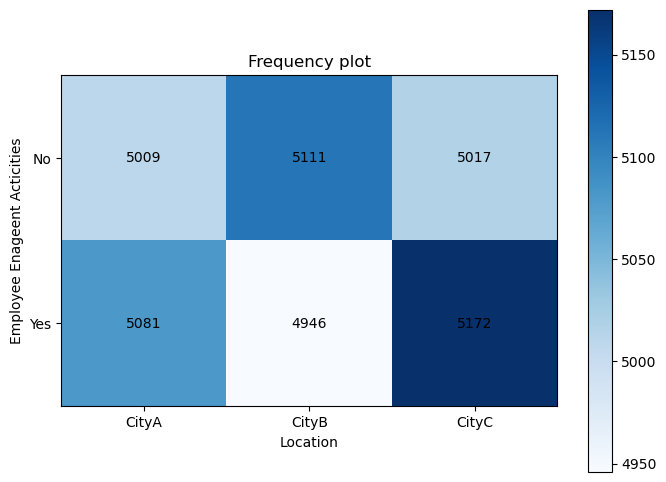

In [45]:
cross_tab = pd.crosstab(df['Employee_Engagement_Activities'], df['Location'])

plt.figure(figsize = (8, 6))

plt.imshow(cross_tab, cmap = 'Blues')
plt.title('Frequency plot')
plt.xlabel('Location')
plt.ylabel('Employee Enageent Acticities')
plt.xticks(range(len(cross_tab.columns)), cross_tab.columns)
plt.yticks(range(len(cross_tab.index)), cross_tab.index)

for i in range(len(cross_tab.index)):
    for j in range(len(cross_tab.columns)):
        plt.annotate(str(cross_tab.iloc[i, j]),
                     xy = (j, i),
                      ha = 'center',
                      va = 'center')
plt.colorbar()
plt.show()
        

In [46]:
cross_tab

Location,CityA,CityB,CityC
Employee_Engagement_Activities,,,
No,5009,5111,5017
Yes,5081,4946,5172


### 4.2.3 Bivariate Analysis: Pairs of Numerical and Categorical Variables

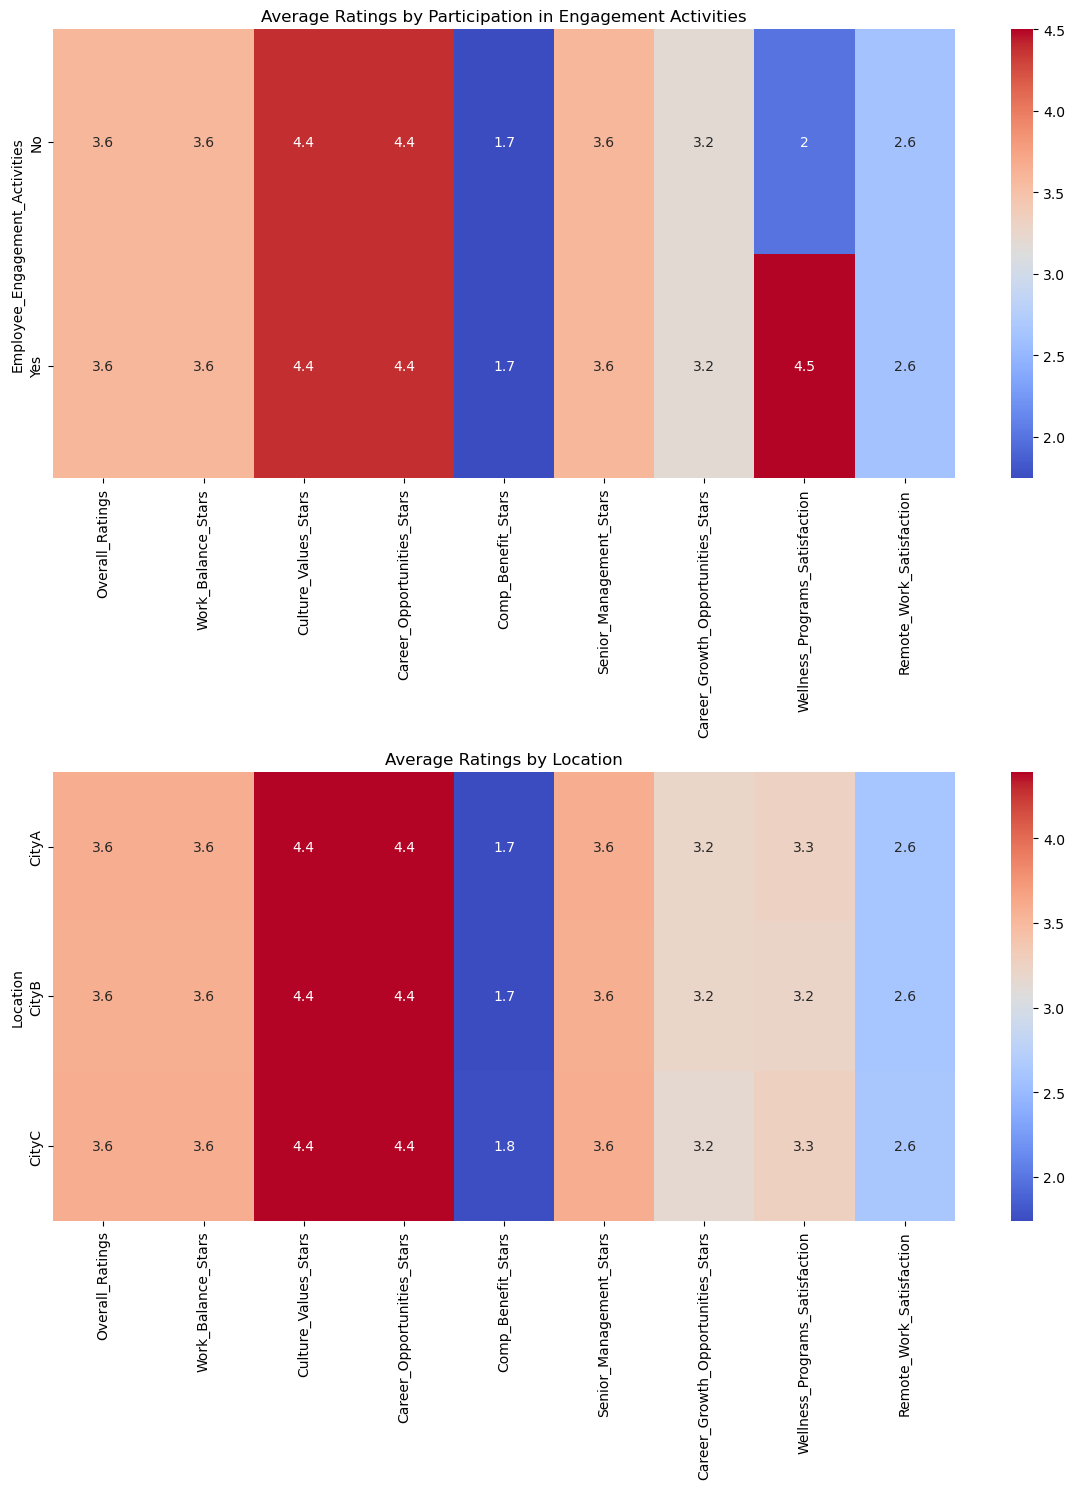

In [48]:
engagement_grouped = df.groupby('Employee_Engagement_Activities')[rating_columns].mean()

location_grouped = df.groupby('Location')[rating_columns].mean()

fig, axes = plt.subplots(2, 1, figsize = (12, 15))

# Employee Engagegement Activities
sns.heatmap(engagement_grouped, cmap = 'coolwarm', ax = axes[0], annot = True)
axes[0].set_title('Average Ratings by Participation in Engagement Activities')

# Location 
sns.heatmap(location_grouped, cmap = 'coolwarm', ax = axes[1], annot = True)
axes[1].set_title('Average Ratings by Location')

plt.tight_layout()
plt.show()

In [49]:
engagement_grouped.T

Employee_Engagement_Activities,No,Yes
Overall_Ratings,3.587699,3.588657
Work_Balance_Stars,3.587699,3.588657
Culture_Values_Stars,4.392284,4.390157
Career_Opportunities_Stars,4.392284,4.390157
Comp_Benefit_Stars,1.746779,1.745707
Senior_Management_Stars,3.587699,3.588657
Career_Growth_Opportunities_Stars,3.194490,3.189881
Wellness_Programs_Satisfaction,1.996433,4.500822
Remote_Work_Satisfaction,2.609368,2.608658


In [50]:
location_grouped.T

Location,CityA,CityB,CityC
Overall_Ratings,3.587810,3.582380,3.594268
Work_Balance_Stars,3.587810,3.582380,3.594268
Culture_Values_Stars,4.392567,4.389480,4.391599
Career_Opportunities_Stars,4.392567,4.389480,4.391599
Comp_Benefit_Stars,1.743211,1.741175,1.754245
Senior_Management_Stars,3.587810,3.582380,3.594268
Career_Growth_Opportunities_Stars,3.205748,3.211494,3.159682
Wellness_Programs_Satisfaction,3.261051,3.219350,3.272843
Remote_Work_Satisfaction,2.605352,2.605350,2.616253


Some intriguing insights through bivariate analysis that examines how engagement activities and geographical location impact overall employee satisfaction.

## Key Findings:
## Engagement Activities:

1. Wellness Programs are a major driver of satisfaction, with participants reporting a satisfaction score of 4.50, compared to just 1.99 for non-participants. This highlights the value employees place on wellness initiatives.
2. Overall Ratings & Work Balance saw slight improvements among those engaged in activities, showing that these initiatives contribute to a better employee experience, albeit modestly.
3. However, perceptions of Culture and Career Opportunities were slightly lower among those who participated in engagement activities, suggesting that these initiatives may not directly influence these areas.

## Location-Based Sentiment:

1. CityC leads in overall employee satisfaction (3.59) and work balance, while CityB shows room for improvement.
2. Career Growth opportunities are rated highest in CityB (3.21), but CityC needs to catch up in this area.
3. Wellness Programs in CityC stand out with the highest satisfaction, offering a model that other cities could replicate to enhance their own employee sentiment.
   
## Implications:
1. Invest in Wellness: The significant boost in satisfaction among those participating in wellness programs underscores the need for continued investment in these initiatives.
2. Localized Strategies: Tailoring engagement activities to address specific needs in different locations can enhance overall employee sentiment.
3. Replicating Success: The success seen in CityC’s wellness satisfaction provides a blueprint for other locations to follow.
By focusing on these areas, we can better understand and improve the factors that drive employee satisfaction across our organization.

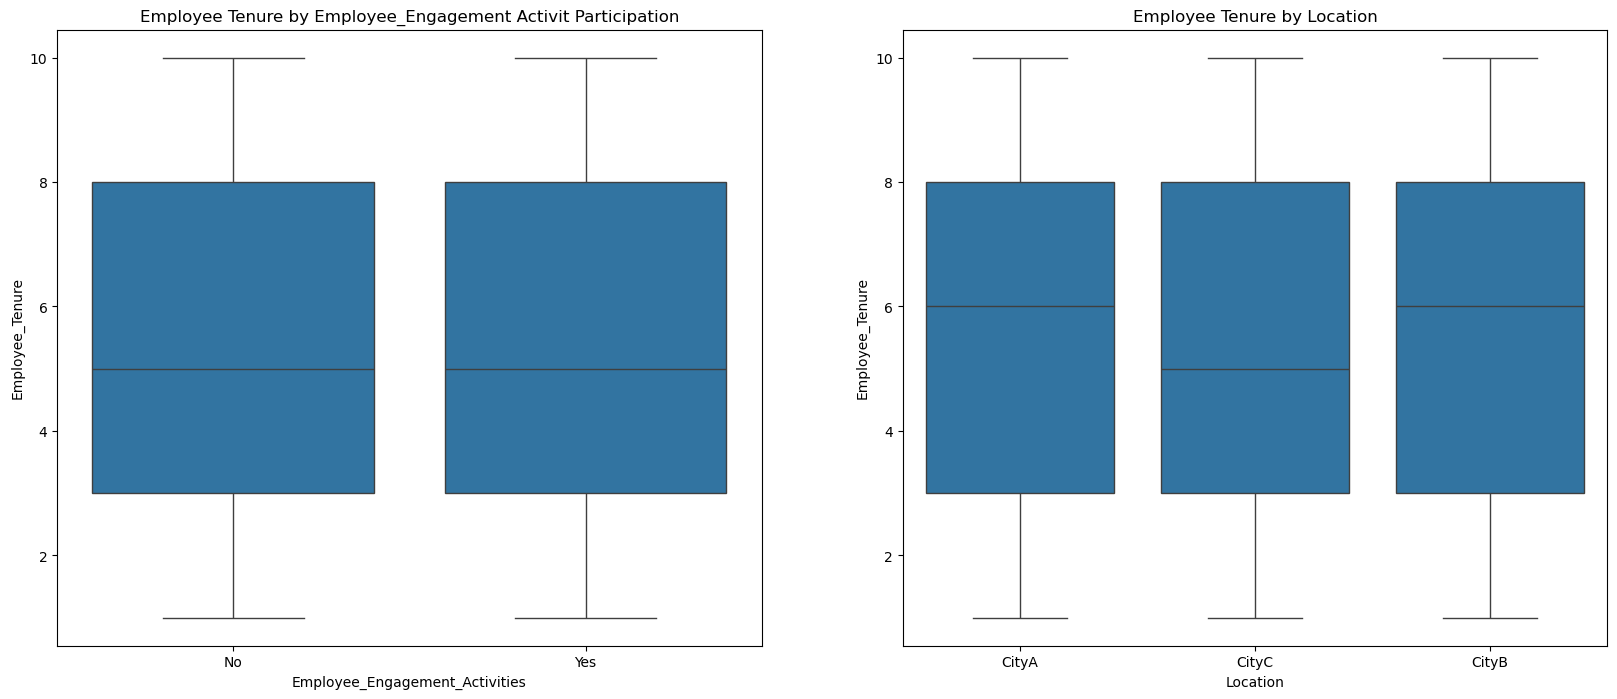

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

engagement_tenure_boxplot = sns.boxplot(x ='Employee_Engagement_Activities', y = 'Employee_Tenure', data = df, ax = ax[0])
ax[0].set_title('Employee Tenure by Employee_Engagement Activit Participation')

location_tenure_boxplot = sns.boxplot(x ='Location', y = 'Employee_Tenure', data = df, ax = ax[1])
ax[1].set_title('Employee Tenure by Location')

plt.show()

### 4.3 Word Frequency Analysis

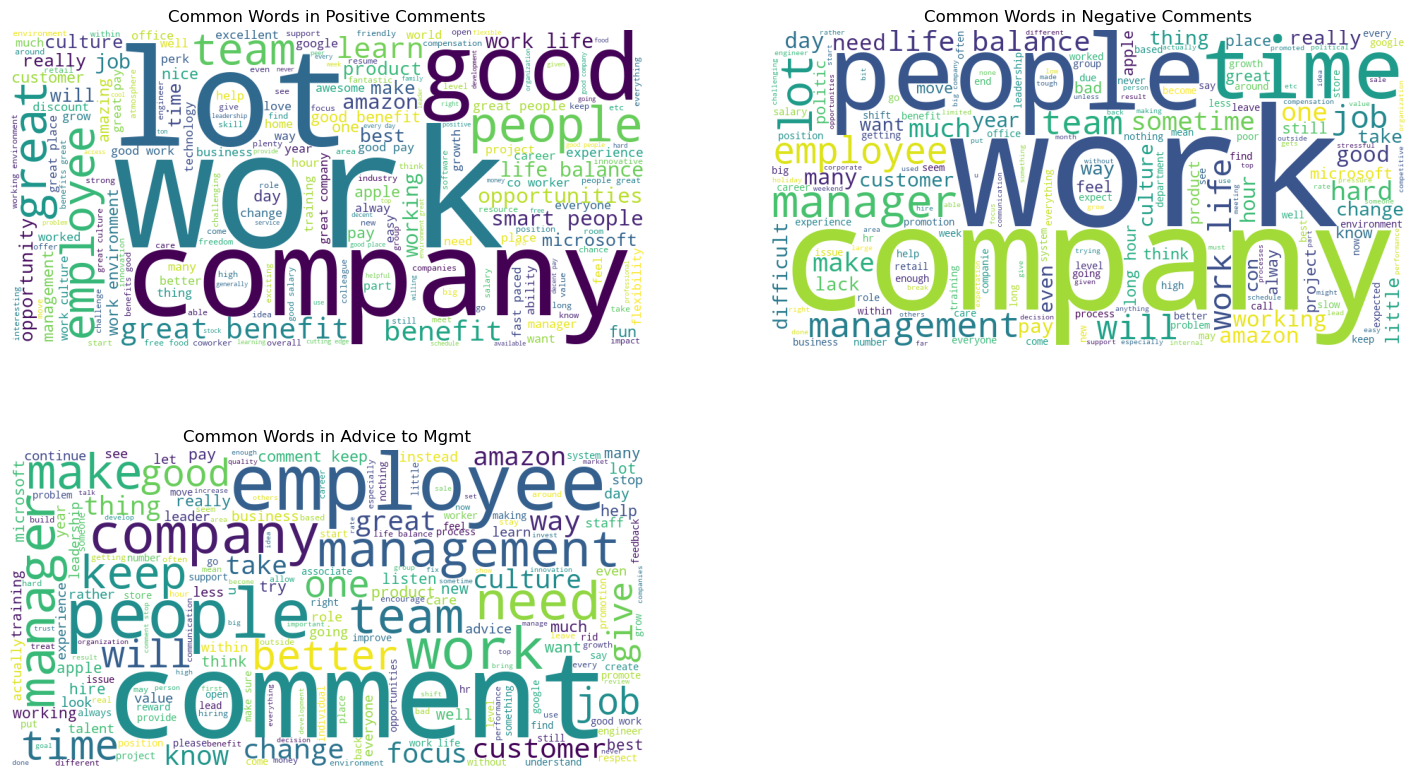

In [54]:
positive_comments = ' '.join(df['Comment_Positives']).lower()
negative_comments = ' '.join(df['Comment_Negatives']).lower()
advice_to_Mgmt = ' '.join(df['Advice_To_Mgmt']).lower()

wordcloud = WordCloud(background_color = 'white', width = 900, height = 450)

fig, ax = plt.subplots(2, 2, figsize = (18, 10))

# Positive Comments
wordcloud.generate_from_text(positive_comments)
ax[0, 0].imshow(wordcloud)
ax[0, 0].set_title('Common Words in Positive Comments')
ax[0, 0].axis('off')

# Negative Comments
wordcloud.generate_from_text(negative_comments)
ax[0, 1].imshow(wordcloud)
ax[0, 1].set_title('Common Words in Negative Comments')
ax[0, 1].axis('off')

# Advice to Mgmt
wordcloud.generate_from_text(advice_to_Mgmt)
ax[1, 0].imshow(wordcloud)
ax[1, 0].set_title('Common Words in Advice to Mgmt')
ax[1, 0].axis('off')

ax[1, 1].remove()

plt.show()

## Key Insights from Word Frequency Analysis:
1. Positive Comments:
- Employees frequently mention great benefits, a great company, and great people. The importance of teamwork, life balance, opportunities, and a positive culture also stand out, highlighting the aspects of work that employees appreciate the most.

2. Negative Comments:
- Words like life balance, management, manager, working hours, and time dominate the negative feedback. These indicate pain points related to work-life balance, management practices, and the overall workload that could be addressed to enhance satisfaction.

3. Advice to Management:
- Common suggestions to management include a focus on people, employee development, and manager training. Employees also emphasize the need for cultural change, better hiring practices, and effective use of time. These insights provide a roadmap for leadership to drive meaningful improvements.

By mapping out these word frequencies, we gain valuable insights into what matters most to employees and where there are opportunities for growth. This is essential for shaping a workplace that truly resonates with its people.

### 4.4 Temporal Analysis

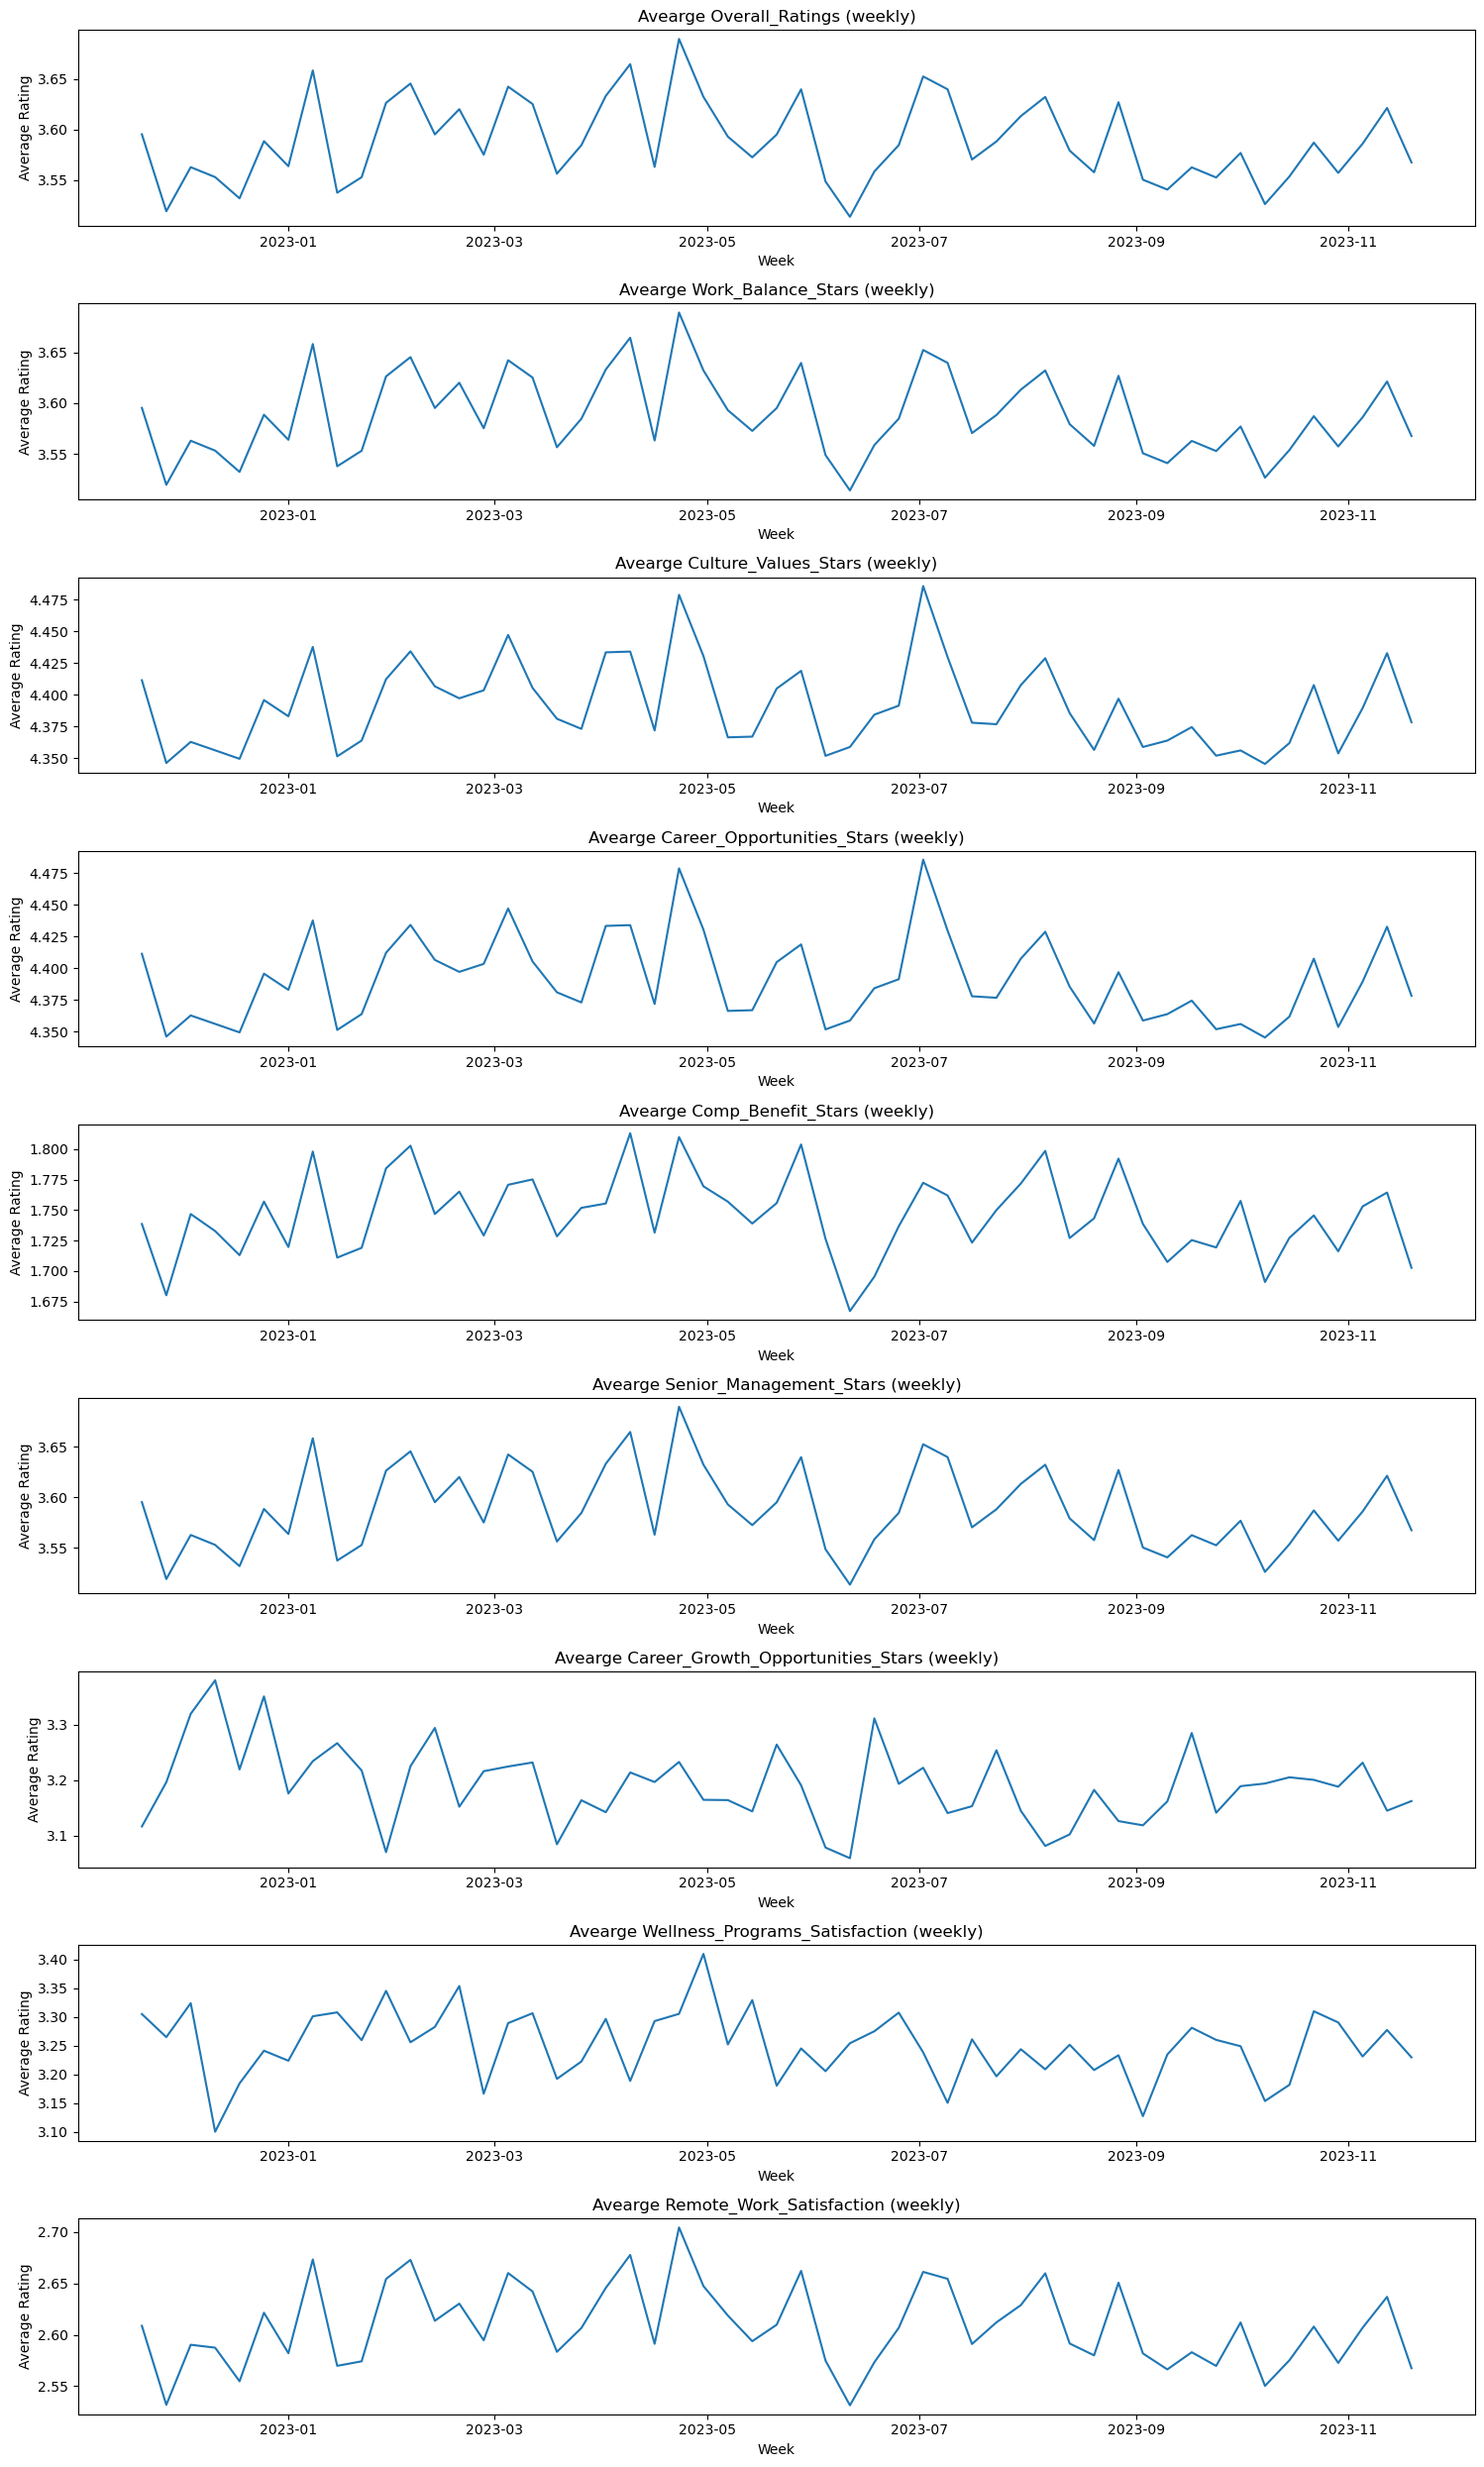

In [57]:
# Ensure Feedback_Date is properly formatted as a datetime object
df['Feedback_Date'] = pd.to_datetime(df['Feedback_Date'])

# Set Feedback_Date as the index
df.set_index('Feedback_Date', inplace = True)

# Resample data weekly and calculate mean ratings
weekly_data = df.resample('W').mean(numeric_only = True)

# Plot the weekly average ratings
fig, ax = plt.subplots(len(rating_columns), 1, figsize = (15, 25))

for i in range(len(rating_columns)):
    column = rating_columns[i]
    ax[i].plot(weekly_data.index, weekly_data[column])
    ax[i].set_title(f'Avearge {column} (weekly)')
    ax[i].set_xlabel('Week')
    ax[i].set_ylabel('Average Rating')
    
plt.tight_layout()
plt.show()

## Temporal Analysis

Continuing our in-depth exploration of employee feedback sentiment, we now dive into the temporal aspect of our analysis. After resampling and plotting the data on a weekly basis, we observed that there is no discernible trend in the average ratings over time.

This suggests that employee sentiments, whether positive or negative, remained relatively consistent throughout the period under review. While this stability might seem reassuring, it also highlights an opportunity to dig deeper. Understanding why there is no significant change—despite ongoing initiatives—could provide valuable insights into areas that might require a fresh approach or enhanced focus.

### Conclusion 

#### Key_Insights:

1. Employee Engagement & Location:

- Engagement activities show minimal impact on average ratings, signaling the need for more personalized initiatives.

- Ratings across different locations are consistent, with minor variations, reflecting stable sentiment levels.

2. Sentiment & Feedback:

- Positive Highlights: Great benefits, company culture, and work-life balance stand out.

- Negative Feedback: Concerns about management, work-life balance, and long working hours are prevalent.

- Advice to Management: Employees are calling for a stronger focus on employee well-being, better training, and cultural improvements.

3. Temporal Analysis:
- No significant trends were observed in average ratings over time, indicating stable yet stagnant sentiment levels.

## Recommendations

1. Enhance Management Practices: Improve leadership and communication through targeted training.

2. Revamp Engagement Strategies: Introduce more personalized and varied engagement activities.

3. Focus on Culture & Career Growth: Strengthen company culture and make career growth opportunities more accessible.

4. Continuous Monitoring: Implement ongoing sentiment analysis to detect and address issues in real time.

5. Targeted Interventions: Tailor interventions to specific locations based on sentiment variations.

### Final_Thoughts

Understanding and acting on employee feedback is crucial for building a more engaged and #productive_workforce. By adopting a data-driven approach, organizations can make informed decisions that resonate with their employees' needs.